In [12]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

In [4]:
model=MobileNet(include_top=False,input_shape=(224,224,3))

In [5]:
for layer in model.layers:
    layer.trainable=False

flatten_layers=layers.Flatten()(model.output)
flayers=layers.Dense(512,activation="relu")(flatten_layers)
output=layers.Dense(1,activation="sigmoid")(flayers)


In [6]:
model=Model(inputs=model.inputs,outputs=output)

In [7]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=["acc"])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 28,920,001 (110.32 MB)

 Trainable params: 25,691,137 (98.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
train_data="training_folder"
validation_data="validation_folder"

In [9]:
train_data_generator=ImageDataGenerator(rescale=1/255,
                                        rotation_range=45,
                                        width_shift_range=0.3,
                                        height_shift_range=0.3,
                                        shear_range=0.3,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode="nearest")
validation_data_generator=ImageDataGenerator(rescale=1/255)

In [10]:
train_generator=train_data_generator.flow_from_directory(train_data,target_size=(224,224),batch_size=16,class_mode="binary")

validation_generator=validation_data_generator.flow_from_directory(validation_data,target_size=(224,224),batch_size=16,class_mode="binary")

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [13]:
history=model.fit(train_generator,
                  epochs=5,
                  steps_per_epoch=100,
                  validation_data=validation_generator)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - acc: 0.7969 - loss: 0.5840 - val_acc: 0.9071 - val_loss: 0.2235
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - acc: 0.8227 - loss: 0.4525 - val_acc: 0.8714 - val_loss: 0.5000
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 164ms/step - acc: 0.8517 - loss: 0.4528 - val_acc: 0.8786 - val_loss: 0.3885
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - acc: 0.8713 - loss: 0.3423 - val_acc: 0.9143 - val_loss: 0.1869
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - acc: 0.8992 - loss: 0.2397 - val_acc: 0.9071 - val_loss: 0.2038


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Dog


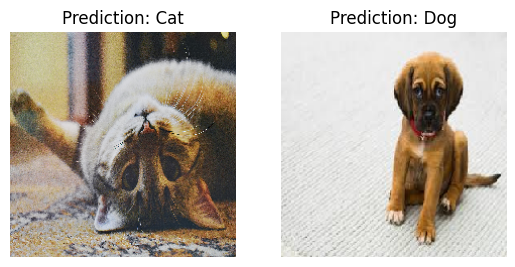

In [53]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_paths = ['sample1.jpg','sample2.jpg']  
for i in range(2):
    plt.subplot(1,2,i+1)
    img = image.load_img(img_paths[i], target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  
    img_array = np.expand_dims(img_array, axis=0)  

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print(f"Prediction: Dog")
    else:
        print(f"Prediction: Cat")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {'Dog' if prediction[0][0] > 0.5 else 'Cat'}")
plt.show()

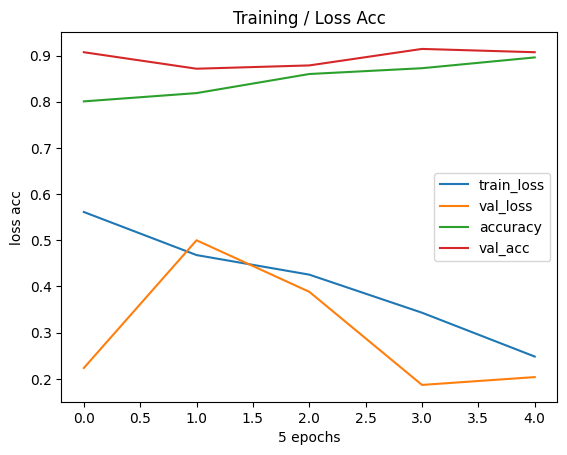

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
epochs=5
plt.plot(np.arange(0, epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), history.history["acc"], label="accuracy")
plt.plot(np.arange(0, epochs), history.history["val_acc"], label="val_acc")

plt.title("Training / Loss Acc")
plt.xlabel("5 epochs")
plt.ylabel("loss acc")
plt.legend()
plt.show()
